INTRODUCTION TO CNN

In [ ]:
# Make sure this is the first cell
%matplotlib inline

import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import numpy as np

In [ ]:
# Load dataset
transform = transforms.ToTensor()
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)


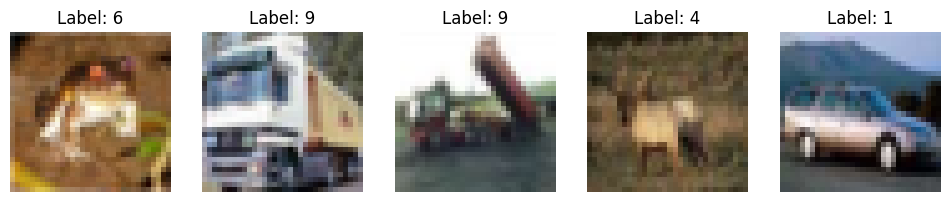

In [ ]:
# Visualize sample images
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    image, label = train_dataset[i]
    axes[i].imshow(image.permute(1, 2, 0))  # Convert from [C, H, W] to [H, W, C]
    axes[i].axis('off')
    axes[i].set_title(f'Label: {label}')
plt.show()


In [ ]:
# Display pixel values for the first image
image, label = train_dataset[0]
print(f'Label: {label}')
print(f'Image Shape: {image.shape}')  # Should be [3, 32, 32]
print("Pixel Values:")
print(image)

Label: 6
Image Shape: torch.Size([3, 32, 32])
Pixel Values:
tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235]

In [ ]:

import tensorflow as tf

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
#define a simple CNN model
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(32,32,3) ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),   #10 classes

    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       921,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 923,914 (3.52 MB)

 Trainable params: 923,914 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
!pip install torch torchvision

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a simple CNN model by subclassing nn.Module
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()  # Call the parent class constructor

        # First convolutional layer:
        # - Input channels: 3 (RGB)
        # - Output channels: 32
        # - Kernel size: 3x3
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)

        # Max pooling layer:
        # - Kernel size: 2x2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # First fully connected (dense) layer:
        # - Input features: 32 feature maps of size 15x15 after pooling
        # - Output features: 128
        self.fc1 = nn.Linear(in_features=32 * 15 * 15, out_features=128)

        # Output layer:
        # - Input features: 128
        # - Output features: 10 (for 10 CIFAR-10 classes)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    # Define the forward pass
    def forward(self, x):
        # Apply convolution followed by ReLU
        x = F.relu(self.conv1(x))

        # Apply max pooling
        x = self.pool(x)

        # Flatten the tensor from 4D [batch, channels, height, width] to 2D [batch, features]
        x = x.view(-1, 32 * 15 * 15)

        # Apply first dense layer with ReLU activation
        x = F.relu(self.fc1(x))

        # Output layer (raw logits, softmax will be applied later if needed)
        x = self.fc2(x)

        return x

# Instantiate and confirm the model is ready
model = SimpleCNN()
print("PyTorch CNN model ready")


PyTorch CNN model ready
